<a href="https://colab.research.google.com/github/maybje/CE888/blob/master/lab10/lab10_EDA_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import csv
from sklearn.preprocessing import  StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pickle

In [3]:
import os
os.environ['KAGGLE_USERNAME'] = "jemb90" # username from the json file
os.environ['KAGGLE_KEY'] = "9af8fc1dd77b773fe4e780fb265fcc40" # key from the json file
!kaggle datasets download -d ronitf/heart-disease-uci

  0% 0.00/3.40k [00:00<?, ?B/s]
100% 3.40k/3.40k [00:00<00:00, 7.01MB/s]


In [4]:
# Upload data
from zipfile import ZipFile

file_name = "/content/heart-disease-uci.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [3]:
data = pd.read_csv("/content/heart.csv", header=0)
columns=data.columns

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Before splitting into test and training set, we explore the size and the class proportions in order to confirm it has the right level of imbalance
print("Shape: ", data.shape)
#Class proportions

print("Class Proportions:\n", data["target"].value_counts()/data["target"].shape)

Shape:  (303, 14)
Class Proportions:
 1    0.544554
0    0.455446
Name: target, dtype: float64


In [5]:
print(data.describe().transpose()) #latex format for report

          count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal      303.0    2.313531   0.612277

In [0]:
x=data.iloc[:,0:-1]
y=data["target"]

In [0]:
scaler=StandardScaler()
x_norm=x
x_norm[:]=scaler.fit_transform(x_norm[:])

Text(0.5, 0, 'variable')

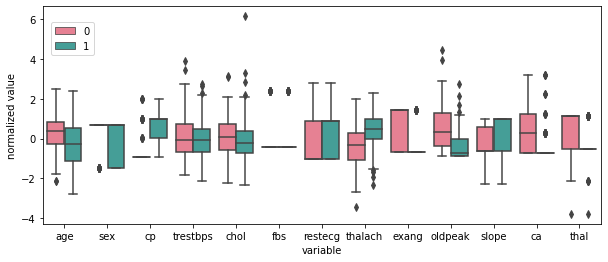

In [13]:
#Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x="variable", y="value", hue="target",\
    data=pd.melt(x_norm.join(y),id_vars=['target']),palette="husl")
plt.legend(bbox_to_anchor=(0.1,0.95))
plt.ylabel("normalized value")
plt.xlabel("variable")

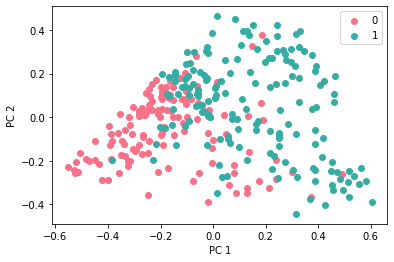

In [21]:
#Scatterplot to the first two principal components using labels
pca = PCA()
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=.1)

x_pca = scikit_kpca.fit_transform(x_norm)

colors = ['#f77189','#36ada4']

for l, c in zip(np.unique(y), colors):
    plt.scatter(x_pca[y == l, 0], 
                x_pca[y == l, 1], 
                 c=c,label=l)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

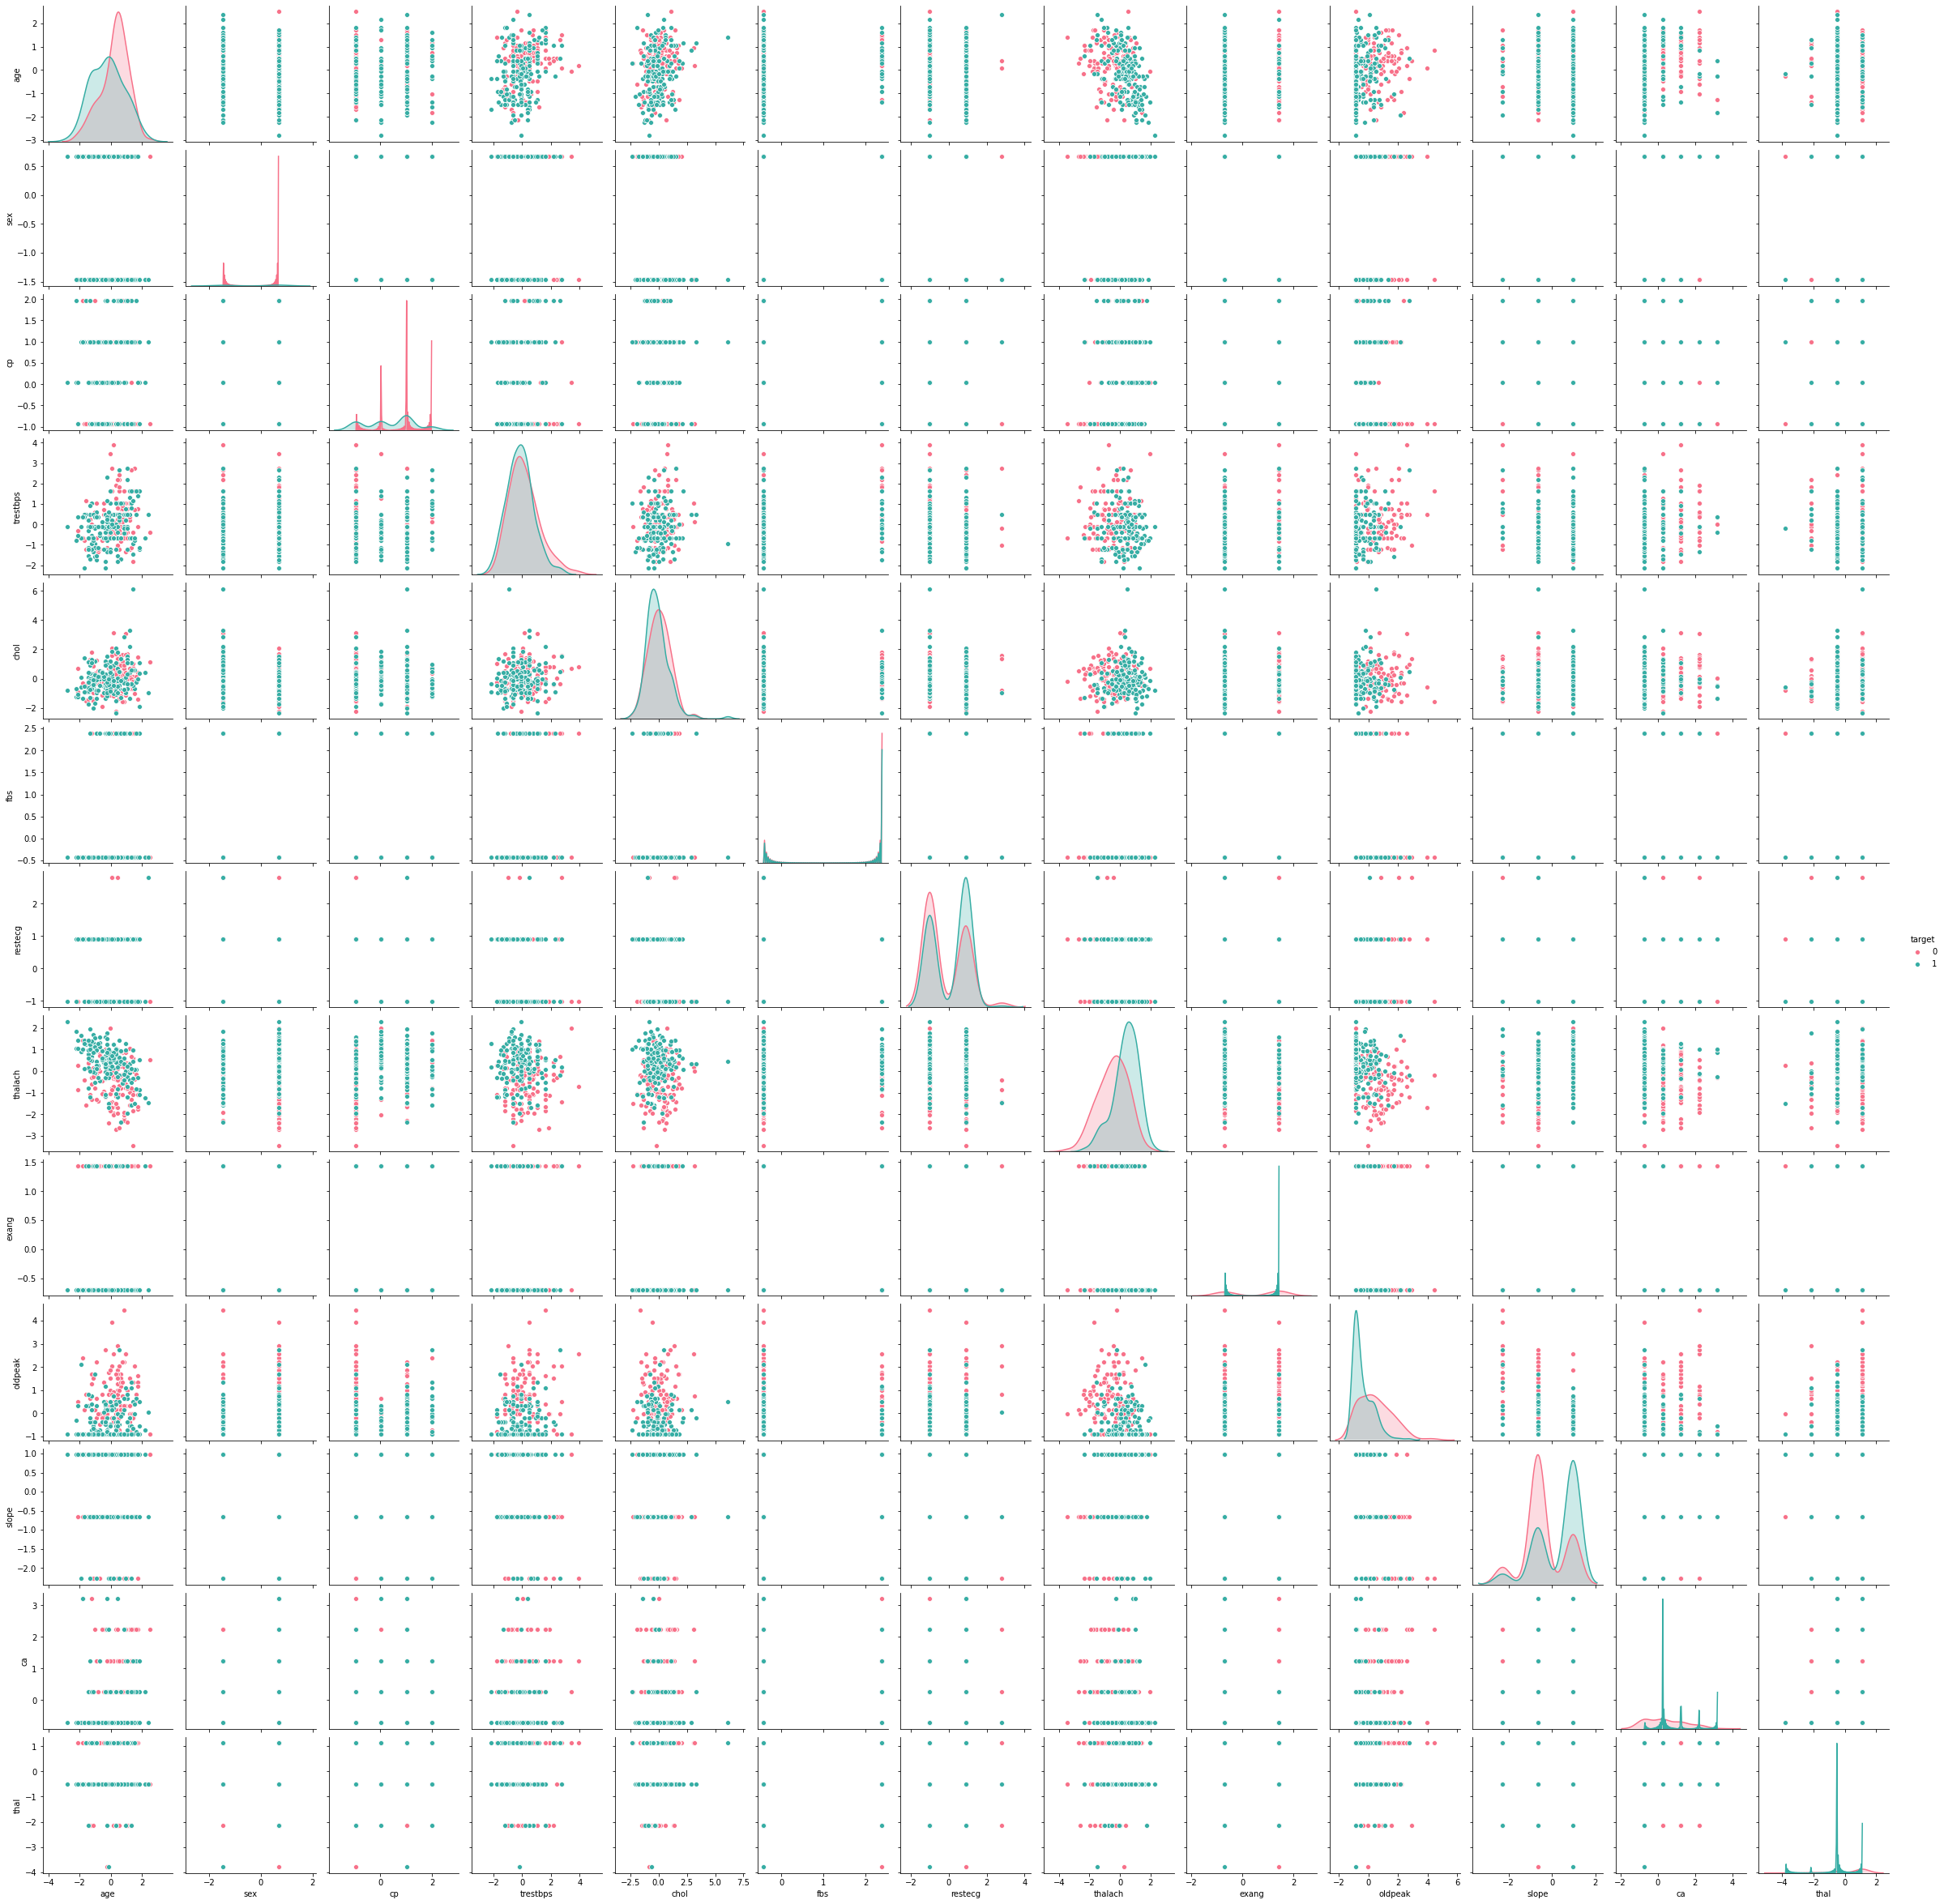

In [12]:
#Scatter plot and density plot of features.
sns.pairplot(x_norm.join(y), hue="target", palette="husl")

In [33]:
logistic=LogisticRegression()
logistic.fit(x_norm,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
filename = "logistic_heart.pkl"
pickle.dump(logistic, open(filename, 'wb'))

In [38]:
svm=LogisticRegression()
svm.fit(x_norm,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
filename = "svm_heart.pkl"
pickle.dump(svm, open(filename, 'wb'))

In [40]:
rf=LogisticRegression()
rf.fit(x_norm,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
filename = "rf_heart.pkl"
pickle.dump(rf, open(filename, 'wb'))